In [1]:
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# use this do download stopwords if you haven't done this before
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drewh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# loading in dataframe, using special encoder parameter to save it correctly
df = pd.read_csv('twitter_data.csv',encoding= 'unicode_escape')

In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [6]:
# renaming the columns
df = df.rename(columns={"tweet_text": "tweet", "emotion_in_tweet_is_directed_at": "subject", "is_there_an_emotion_directed_at_a_brand_or_product": "emotion"})

In [7]:
df.head()

,tweet,subject,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [8]:
df['subject'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: subject, dtype: int64

In [9]:
df['tweet'] = df['tweet'].str.lower()

In [10]:
df['subject'].isna().sum()

5802

In [11]:
df['emotion'].isna().sum()

0

In [12]:
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [13]:
df.loc[df['emotion'] == "I can't tell"]['tweet'][237]

'just what america needs. rt @mention google to launch major new social network called circles, possibly today {link} #sxsw'

In [14]:
df.loc[df['emotion'] == "I can't tell"]['subject'].isna().sum()

147

In [15]:
df['tweet'].isna().sum()

1

In [16]:
df_binary = df.loc[(df['emotion'] == 'Positive emotion' ) | (df['emotion'] == 'Negative emotion' )]

In [17]:
df.loc[df['emotion'] == 'No emotion toward brand or product']['tweet'][9091]

'some verizon iphone customers complained their time fell back an hour this weekend.  of course they were the new yorkers who attended #sxsw.'

In [18]:
df_binary['subject'].isna().sum()

357

In [19]:
len(df_binary)

3548

In [20]:
df_binary.loc[df['subject'].isna()]['tweet']

46      hand-held û÷hoboûª: drafthouse launches û÷h...
64      again? rt @mention line at the apple store is ...
68      boooo! rt @mention flipboard is developing an ...
103     know that &quot;dataviz&quot; translates to &q...
112     spark for #android is up for a #teamandroid aw...
                              ...                        
9011    apparently the line to get an ipad at the #sxs...
9043    hey is anyone doing #sxsw signing up for the g...
9049    @mention you can buy my used ipad and i'll pic...
9052    @mention you could buy a new ipad 2 tmrw at th...
9054    guys, if you ever plan on attending #sxsw, you...
Name: tweet, Length: 357, dtype: object

In [21]:
df_binary.loc[df['subject'] == 'Apple']['tweet']

9       counting down the days to #sxsw plus strong ca...
40      @mention  - great weather to greet you for #sx...
47      hooray rt ûï@mention apple is opening a pop-u...
49      wooooo!!! ûï@mention apple store downtown aus...
62      #omfg! rt @mention heard about apple's pop-up ...
                              ...                        
9022    by the way, i love that y'all are so down to d...
9029    [top story] at #sxsw, apple schools the market...
9033    @mention yep! i can't believe they set up a po...
9048    @mention you bet man! kindle and apple for sur...
9064    @mention you should see the line here at #sxsw...
Name: tweet, Length: 638, dtype: object

In [22]:
df_binary['subject'].isna().sum()

357

In [23]:
# function to label new column based on the product category 

def label_brand(row):
    if row['subject'] == 'iPad':
        return 'Apple'
    elif row['subject'] == 'Apple':
        return 'Apple'
    elif row['subject'] == 'iPad or iPhone App':
        return 'Apple'
    elif row['subject'] == 'iPhone':
        return 'Apple'
    elif row['subject'] == 'Other Apple product or service':
        return 'Apple'
    elif row['subject'] == 'Google':
        return 'Google'
    elif row['subject'] == 'Other Google product or service':
        return 'Google'
    elif row['subject'] == 'Android App':
        return 'Google'
    elif row['subject'] == 'Android':
        return 'Google'
    elif row['subject'] == np.nan: 
        return np.nan

In [24]:
df_binary['company'] = df_binary.apply(lambda row: label_brand(row), axis=1)

<ipython-input-24-3c2e651705a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['company'] = df_binary.apply(lambda row: label_brand(row), axis=1)


In [25]:
df_binary['company'].value_counts()

Apple     2337
Google     854
Name: company, dtype: int64

In [26]:
df_binary['company'].isna().sum()

357

In [27]:
df_binary.isna().sum()

tweet        0
subject    357
emotion      0
company    357
dtype: int64

In [28]:
len(df_binary.loc[(df_binary['subject'].isna()) & (df_binary['tweet'].str.contains("Apple"))])

0

In [29]:
len(df_binary.loc[(df_binary['subject'].isna()) & (df_binary['tweet'].str.contains("Google"))])

0

In [30]:
apple_words = ['apple','ipad','iphone','itunes']
google_words = ['google','android']

In [31]:
df_binary.loc[(df_binary['subject'].isna()) & (df_binary['tweet'].str.contains('|'.join(apple_words))),'company'] = 'Apple'

C:\Users\drewh\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-31-eebd2101ff92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.loc[(df_binary['subject'].isna()) & (df_binary['tweet'].str.contains('|'.join(apple_words))),'company'] = 'Apple'


In [32]:
df_binary.loc[(df_binary['subject'].isna()) & (df_binary['tweet'].str.contains('|'.join(google_words))),'company'] = 'Google'

<ipython-input-32-c57a5e0afc5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.loc[(df_binary['subject'].isna()) & (df_binary['tweet'].str.contains('|'.join(google_words))),'company'] = 'Google'


In [33]:
df_binary['company'].value_counts()

Apple     2546
Google     991
Name: company, dtype: int64

In [34]:
df_binary.isna().sum()

tweet        0
subject    357
emotion      0
company     11
dtype: int64

In [35]:
df_binary.dropna(subset=['company'],inplace=True)

<ipython-input-35-7638a198be87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(subset=['company'],inplace=True)


In [36]:
df_binary.isna().sum()

tweet        0
subject    346
emotion      0
company      0
dtype: int64

In [37]:
df_binary

,tweet,subject,emotion,company
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Apple
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Google
...,...,...,...,...
9077,@mention your pr guy just convinced me to swit...,iPhone,Positive emotion,Apple
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,Apple
9080,diller says google tv &quot;might be run over ...,Other Google product or service,Negative emotion,Google
9085,i've always used camera+ for my iphone b/c it ...,iPad or iPhone App,Positive emotion,Apple


In [38]:
df_google = df_binary.loc[df_binary['company'] == 'Google']

In [39]:
g_X_train, g_X_test, g_y_train, g_y_test = train_test_split(df_google['tweet'], df_google['emotion'])

In [40]:
df_apple = df_binary.loc[df_binary['company'] == 'Apple']

In [41]:
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(df_apple['tweet'], df_apple['emotion'])

### Check for Most Popular Words

In [42]:
from nltk.tokenize import RegexpTokenizer

In [43]:
pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(pattern)

In [44]:
# Create new column with tokenized data
df_apple["text_tokenized"] = df_apple["tweet"].apply(tokenizer.tokenize)
df_google["text_tokenized"] = df_google["tweet"].apply(tokenizer.tokenize)

<ipython-input-44-a3c7c4a8d15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple["text_tokenized"] = df_apple["tweet"].apply(tokenizer.tokenize)
<ipython-input-44-a3c7c4a8d15d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google["text_tokenized"] = df_google["tweet"].apply(tokenizer.tokenize)


In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from nltk import FreqDist

def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)

In [46]:
apple_freq_dist = FreqDist(df_apple["text_tokenized"].explode())

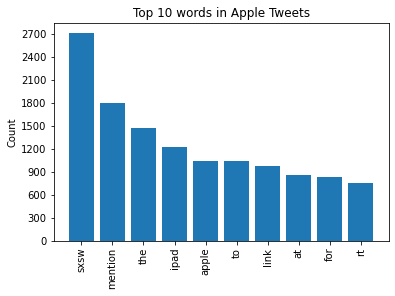

In [47]:
visualize_top_10(apple_freq_dist, "Top 10 words in Apple Tweets")

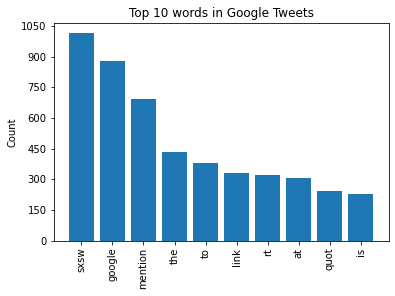

In [48]:
google_freq_dist = FreqDist(df_google["text_tokenized"].explode())
visualize_top_10(google_freq_dist, "Top 10 words in Google Tweets")

<ipython-input-49-02b313256895>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apple_pos = df_apple[df['emotion'] == 'Positive emotion']


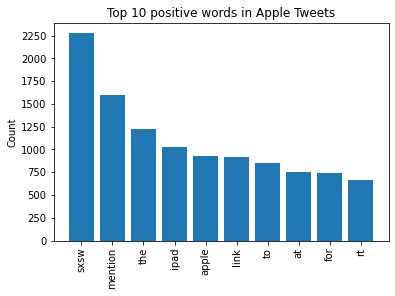

In [49]:
# Apple Positive Words
df_apple_pos = df_apple[df['emotion'] == 'Positive emotion']
apple_pos_freq_dist = FreqDist(df_apple_pos['text_tokenized'].explode())
visualize_top_10(apple_pos_freq_dist, "Top 10 positive words in Apple Tweets")

<ipython-input-50-3d38d6594223>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_google_pos = df_google[df['emotion'] == 'Positive emotion']


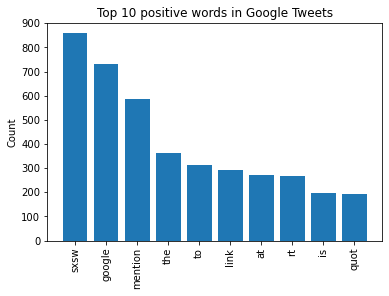

In [50]:
# Google Positive Words
df_google_pos = df_google[df['emotion'] == 'Positive emotion']
google_pos_freq_dist = FreqDist(df_google_pos['text_tokenized'].explode())
visualize_top_10(google_pos_freq_dist, "Top 10 positive words in Google Tweets")

### Baseline Model with TfidfVectorizer and MultinomialNB

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer(max_features=10, token_pattern=r"(?u)\b\w\w+\b")
apple_vectorized = tfidf.fit_transform(a_X_train)
pd.DataFrame.sparse.from_spmatrix(apple_vectorized, columns=tfidf.get_feature_names())

,apple,at,for,ipad,link,mention,rt,sxsw,the,to
0,0.000000,0.000000,0.000000,0.000000,0.891957,0.000000,0.000000,0.452120,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.261274,0.000000,0.000000,0.000000,0.147013,0.267429,0.915754
3,0.000000,0.596711,0.000000,0.000000,0.000000,0.000000,0.000000,0.273313,0.497179,0.567494
4,0.000000,0.609828,0.000000,0.496414,0.551055,0.000000,0.000000,0.279322,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1904,0.000000,0.000000,0.000000,0.527300,0.585341,0.000000,0.000000,0.296701,0.539722,0.000000
1905,0.000000,0.000000,0.437377,0.000000,0.384985,0.650727,0.446051,0.195143,0.000000,0.000000
1906,0.000000,0.000000,0.000000,0.000000,0.712257,0.601952,0.000000,0.361032,0.000000,0.000000
1907,0.411812,0.000000,0.463914,0.367853,0.408343,0.000000,0.000000,0.413966,0.376519,0.000000


In [53]:
# Import relevant class and function
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Instantiate a MultinomialNB classifier
baseline_model = MultinomialNB()

# Evaluate the classifier on X_train_vectorized and y_train
baseline_cv_apple = cross_val_score(baseline_model, apple_vectorized, a_y_train)
baseline_cv_apple.mean()


0.8360404556760248

In [54]:
a_y_train.value_counts(normalize=True)

Positive emotion    0.83604
Negative emotion    0.16396
Name: emotion, dtype: float64

In [55]:
google_vectorized = tfidf.fit_transform(g_X_train)
pd.DataFrame.sparse.from_spmatrix(google_vectorized, columns=tfidf.get_feature_names())

,at,google,is,link,mention,quot,rt,sxsw,the,to
0,0.000000,0.331613,0.685095,0.587520,0.000000,0.000000,0.000000,0.274770,0.000000,0.000000
1,0.000000,0.452297,0.000000,0.000000,0.000000,0.000000,0.000000,0.374767,0.000000,0.809306
2,0.647006,0.704425,0.000000,0.000000,0.000000,0.000000,0.000000,0.291838,0.000000,0.000000
3,0.452763,0.492944,0.000000,0.436675,0.000000,0.000000,0.000000,0.408447,0.000000,0.441018
4,0.000000,0.174205,0.000000,0.000000,0.000000,0.922852,0.000000,0.144344,0.000000,0.311709
...,...,...,...,...,...,...,...,...,...,...
738,0.000000,0.288954,0.596964,0.000000,0.000000,0.000000,0.000000,0.239423,0.485276,0.517032
739,0.000000,0.314491,0.000000,0.000000,0.433809,0.000000,0.573009,0.260583,0.000000,0.562727
740,0.000000,0.255491,0.000000,0.000000,0.704847,0.000000,0.000000,0.211696,0.429078,0.457156
741,0.000000,0.317342,0.000000,0.562236,0.437741,0.000000,0.000000,0.262945,0.000000,0.567827


In [56]:
baseline_cv_google = cross_val_score(baseline_model, google_vectorized, g_y_train)
baseline_cv_google.mean()

0.839842191184473

In [57]:
g_y_train.value_counts(normalize=True)

Positive emotion    0.839838
Negative emotion    0.160162
Name: emotion, dtype: float64

#### Removing Stopwords

In [58]:
stopwords_list = stopwords.words('english')

In [59]:
# Instantiate the vectorizer
tfidf_2 = TfidfVectorizer(
    max_features=10,
    token_pattern=r"(?u)\b\w\w+\b",
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
apple_vectorized_2 = tfidf_2.fit_transform(a_X_train)

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(apple_vectorized_2, columns=tfidf_2.get_feature_names())

,app,apple,ipad,iphone,link,mention,quot,rt,store,sxsw
0,0.000000,0.000000,0.000000,0.725015,0.614320,0.000000,0.000000,0.000000,0.000000,0.311390
1,0.000000,0.000000,0.000000,0.918838,0.000000,0.000000,0.000000,0.000000,0.000000,0.394635
2,0.000000,0.000000,0.871509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490380
3,0.000000,0.000000,0.000000,0.305111,0.000000,0.000000,0.943258,0.000000,0.000000,0.131043
4,0.726302,0.000000,0.430547,0.000000,0.477938,0.000000,0.000000,0.000000,0.000000,0.242260
...,...,...,...,...,...,...,...,...,...,...
1904,0.000000,0.000000,0.626363,0.000000,0.695308,0.000000,0.000000,0.000000,0.000000,0.352442
1905,0.502149,0.000000,0.000000,0.389977,0.330436,0.558524,0.000000,0.382849,0.000000,0.167493
1906,0.000000,0.000000,0.000000,0.643461,0.545217,0.460781,0.000000,0.000000,0.000000,0.276363
1907,0.000000,0.433245,0.386998,0.000000,0.429595,0.000000,0.000000,0.000000,0.536945,0.435511


In [60]:
# Evaluate the classifier on apple_vectorized and y_train
stopwords_removed_cv_apple = cross_val_score(baseline_model, apple_vectorized_2, a_y_train)
stopwords_removed_cv_apple.mean()

0.8360404556760248

In [61]:
print("Baseline:         ", baseline_cv_apple.mean())
print("Stopwords removed:", stopwords_removed_cv_apple.mean())

Baseline:          0.8360404556760248
Stopwords removed: 0.8360404556760248


In [62]:
google_vectorized_2 = tfidf_2.fit_transform(g_X_train)
pd.DataFrame.sparse.from_spmatrix(google_vectorized_2, columns=tfidf_2.get_feature_names())

,android,circles,google,link,maps,mention,new,quot,rt,sxsw
0,0.000000,0.741662,0.305355,0.540999,0.000000,0.000000,0.000000,0.000000,0.000000,0.253013
1,0.000000,0.000000,0.345100,0.000000,0.893947,0.000000,0.000000,0.000000,0.000000,0.285945
2,0.000000,0.746513,0.614705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254668
3,0.000000,0.000000,0.508024,0.450034,0.000000,0.000000,0.601822,0.000000,0.000000,0.420941
4,0.000000,0.000000,0.183339,0.000000,0.000000,0.000000,0.000000,0.971241,0.000000,0.151912
...,...,...,...,...,...,...,...,...,...,...
738,0.000000,0.000000,0.770016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.638025
739,0.000000,0.678663,0.279417,0.000000,0.000000,0.385427,0.000000,0.000000,0.509103,0.231521
740,0.584232,0.000000,0.266166,0.000000,0.000000,0.734296,0.000000,0.000000,0.000000,0.220541
741,0.000000,0.568692,0.234140,0.414827,0.000000,0.322972,0.554741,0.000000,0.000000,0.194005


In [63]:
# Evaluate the classifier on google_vectorized_2 and g_y_train
stopwords_removed_cv_google = cross_val_score(baseline_model, google_vectorized_2, g_y_train)
stopwords_removed_cv_google.mean()

0.839842191184473

In [64]:
print("Baseline:         ", baseline_cv_google.mean())
print("Stopwords removed:", stopwords_removed_cv_google.mean())

Baseline:          0.839842191184473
Stopwords removed: 0.839842191184473


## Identifying Additional Stopwords

<ipython-input-65-dfe88d4610f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apple_pos = df_apple[df['emotion'] == 'Positive emotion']
<ipython-input-65-dfe88d4610f0>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apple_neg = df_apple[df['emotion'] == 'Negative emotion']


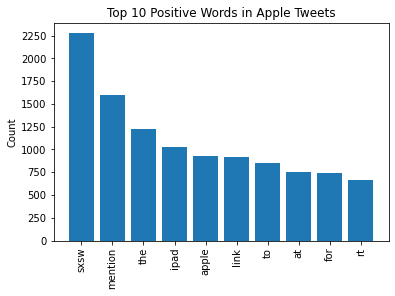

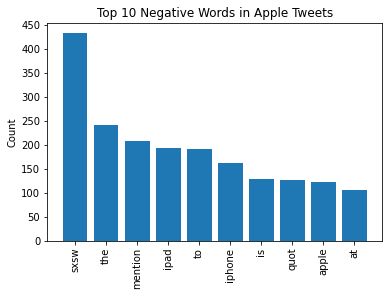

In [65]:
# Apple Positive Words
df_apple_pos = df_apple[df['emotion'] == 'Positive emotion']
apple_pos_freq_dist = FreqDist(df_apple_pos['text_tokenized'].explode())
visualize_top_10(apple_pos_freq_dist, "Top 10 Positive Words in Apple Tweets")

# Apple Negative Words
df_apple_neg = df_apple[df['emotion'] == 'Negative emotion']
apple_neg_freq_dist = FreqDist(df_apple_neg['text_tokenized'].explode())
visualize_top_10(apple_neg_freq_dist, "Top 10 Negative Words in Apple Tweets")

<ipython-input-66-76debba97473>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_google_pos = df_google[df['emotion'] == 'Positive emotion']
<ipython-input-66-76debba97473>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_google_neg = df_google[df['emotion'] == 'Negative emotion']


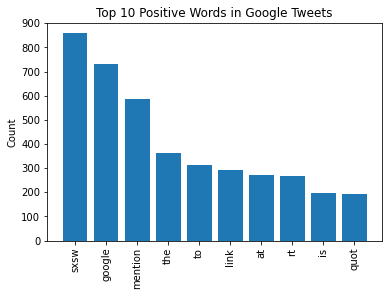

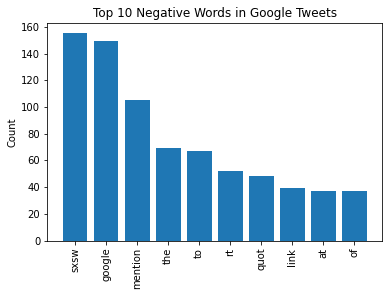

In [66]:
# Google Positive Words
df_google_pos = df_google[df['emotion'] == 'Positive emotion']
google_pos_freq_dist = FreqDist(df_google_pos['text_tokenized'].explode())
visualize_top_10(google_pos_freq_dist, "Top 10 Positive Words in Google Tweets")

# Google Positive Words
df_google_neg = df_google[df['emotion'] == 'Negative emotion']
google_neg_freq_dist = FreqDist(df_google_neg['text_tokenized'].explode())
visualize_top_10(google_neg_freq_dist, "Top 10 Negative Words in Google Tweets")

In [67]:
stopwords_list.extend(["sxsw", "mention", "ipad", "apple", "link", "quot", "google"])

## Running Model with Additional Stopwords

In [68]:
# Instantiate the vectorizer
tfidf_3 = TfidfVectorizer(
    max_features=10,
    token_pattern=r"(?u)\b\w\w+\b",
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
apple_vectorized_3 = tfidf_3.fit_transform(a_X_train)

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(apple_vectorized_3, columns=tfidf_3.get_feature_names())

,amp,app,austin,ipad2,iphone,new,one,pop,rt,store
0,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.00000
1,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.00000
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000
3,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.00000
4,0.0,0.660572,0.000000,0.0,0.000000,0.750763,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1904,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000
1905,0.0,0.676600,0.000000,0.0,0.525459,0.000000,0.0,0.0,0.515854,0.00000
1906,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.00000
1907,0.0,0.000000,0.795022,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.60658


In [69]:
# Evaluate the classifier on apple_vectorized and y_train
stopwords_removed_cv_apple2 = cross_val_score(baseline_model, apple_vectorized_3, a_y_train)
stopwords_removed_cv_apple2.mean()

0.8360404556760248

In [70]:
print("Baseline:                    ", baseline_cv_apple.mean())
print("Stopwords removed:           ", stopwords_removed_cv_apple.mean())
print("Additional Stopwords removed:", stopwords_removed_cv_apple2.mean())

Baseline:                     0.8360404556760248
Stopwords removed:            0.8360404556760248
Additional Stopwords removed: 0.8360404556760248


In [71]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    X = list(set(sum(list(token_list.values), [])))
    stopwords_removed = [token for token in X if token not in stopwords_list]
    return stopwords_removed

In [72]:
tokens_example = df_google["text_tokenized"]

print("Length with stopwords:", len(list(set(sum(list(df_google["text_tokenized"].values), [])))))

tokens_example_without_stopwords = remove_stopwords(tokens_example)
print("Length without stopwords:", len(tokens_example_without_stopwords))

Length with stopwords: 2725
Length without stopwords: 2598


In [73]:
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in stopwords_list have been
    removed
    """
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [74]:
df_google["tokens_no_stopwords"] = df_google["text_tokenized"].apply(remove_stopwords)
df_apple["tokens_no_stopwords"] = df_apple["text_tokenized"].apply(remove_stopwords)

<ipython-input-74-e94c7e080a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google["tokens_no_stopwords"] = df_google["text_tokenized"].apply(remove_stopwords)
<ipython-input-74-e94c7e080a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple["tokens_no_stopwords"] = df_apple["text_tokenized"].apply(remove_stopwords)


<ipython-input-75-8a4cb6ba6b80>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apple_pos = df_apple[df['emotion'] == 'Positive emotion']
<ipython-input-75-8a4cb6ba6b80>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_apple_neg = df_apple[df['emotion'] == 'Negative emotion']


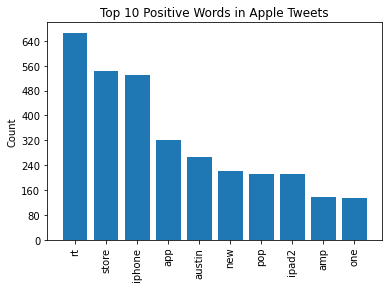

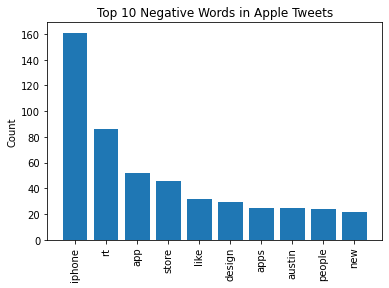

In [75]:
# Apple Positive Words
df_apple_pos = df_apple[df['emotion'] == 'Positive emotion']
apple_pos_freq_dist = FreqDist(df_apple_pos['tokens_no_stopwords'].explode())
visualize_top_10(apple_pos_freq_dist, "Top 10 Positive Words in Apple Tweets")

# Apple Negative Words
df_apple_neg = df_apple[df['emotion'] == 'Negative emotion']
apple_neg_freq_dist = FreqDist(df_apple_neg['tokens_no_stopwords'].explode())
visualize_top_10(apple_neg_freq_dist, "Top 10 Negative Words in Apple Tweets")

<ipython-input-76-189de02ec8af>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_google_pos = df_google[df['emotion'] == 'Positive emotion']
<ipython-input-76-189de02ec8af>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_google_neg = df_google[df['emotion'] == 'Negative emotion']


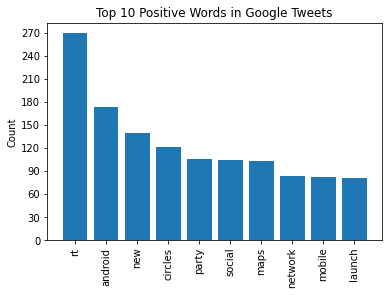

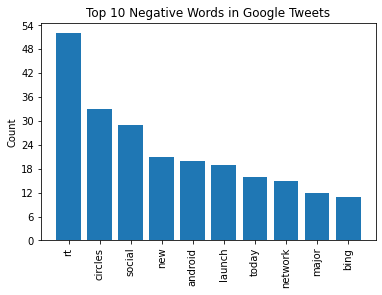

In [76]:
# Google Positive Words
df_google_pos = df_google[df['emotion'] == 'Positive emotion']
google_pos_freq_dist = FreqDist(df_google_pos['tokens_no_stopwords'].explode())
visualize_top_10(google_pos_freq_dist, "Top 10 Positive Words in Google Tweets")

# Google Positive Words
df_google_neg = df_google[df['emotion'] == 'Negative emotion']
google_neg_freq_dist = FreqDist(df_google_neg['tokens_no_stopwords'].explode())
visualize_top_10(google_neg_freq_dist, "Top 10 Negative Words in Google Tweets")

In [77]:
stopwords_list.extend(["iphone", "app", "store", "austin", "rt", "circles", "new", "android", "social", "launch", "today", "network"])

In [78]:
# Instantiate the vectorizer
tfidf_4 = TfidfVectorizer(
    max_features=10,
    token_pattern=r"(?u)\b\w\w+\b",
    stop_words=stopwords_list
)

# Fit the vectorizer on X_train["text"] and transform it
apple_vectorized_4 = tfidf_4.fit_transform(a_X_train)

# Visually inspect the vectorized data
pd.DataFrame.sparse.from_spmatrix(apple_vectorized_4, columns=tfidf_4.get_feature_names())

,amp,cool,get,go,ipad2,like,line,one,pop,via
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Evaluate the classifier on apple_vectorized and y_train
stopwords_removed_cv_apple3 = cross_val_score(baseline_model, apple_vectorized_4, a_y_train)
stopwords_removed_cv_apple.mean()

0.8360404556760248

In [80]:
print("Baseline:                    ", baseline_cv_apple.mean())
print("Stopwords removed:           ", stopwords_removed_cv_apple.mean())
print("Additional Stopwords removed:", stopwords_removed_cv_apple2.mean())
print("Even More Stopwords removed: ", stopwords_removed_cv_apple3.mean())

Baseline:                     0.8360404556760248
Stopwords removed:            0.8360404556760248
Additional Stopwords removed: 0.8360404556760248
Even More Stopwords removed:  0.8360404556760248
